<a href="https://colab.research.google.com/github/jailer2024/JAILER-CHAPID-SE-ALES-Y-SISTEMAS/blob/main/c_digos_parcial_2_sys_2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

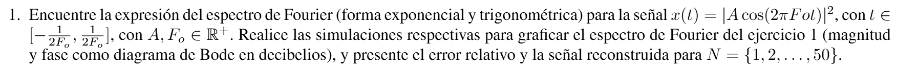

In [ ]:
streamlit_app.py
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st

st.title('Simulación de transformada de Fourier de una señal')

# Parámetros de la señal (con sliders de Streamlit)
A = st.slider('Amplitud (A)', min_value=1, max_value=10, value=8)
Fo = st.slider('Frecuencia fundamental (Fo) [Hz]', min_value=0.1, max_value=10.0, value=1.0)
N = st.slider('Número de armónicos (N)', min_value=1, max_value=50, value=50)

Fs = 100 * Fo  # Frecuencia de muestreo (depende de Fo)
ti = -1 / (2 * Fo)  # Tiempo inicial (depende de Fo)
tf = 1 / (2 * Fo)   # Tiempo final (depende de Fo)
T = tf - ti      # Intervalo de interés (depende de Fo)

wo = 2 * np.pi / T  # Frecuencia angular
tv = np.arange(ti, tf, 1 / Fs)  # Vector de tiempo

# Definir bases
phin = np.zeros((len(tv), 2 * N + 1), dtype=np.complex_)
for n in range(-N, N + 1):
    phin[:, n + N] = np.exp(1j * n * wo * tv)  # Base de Fourier

# Calcular el espectro de Fourier (según la señal estudiada)
cn = np.zeros(2 * N + 1, dtype=np.complex_)
nv = np.linspace(-N, N, 2 * N + 1)  # Vector de armónicos
cn[N] = A**2 / 2  # Nivel DC (C_0)
cn[N - 2] = -(A**2 / 4)  # Armónico -2
cn[N + 2] = -(A**2 / 4)  # Armónico +2

# Señal original (con la amplitud variable)
x = abs(A * np.sin(2 * np.pi * Fo * tv)) ** 2

# Potencia de la señal original (con la amplitud variable)
Px = 3 * (A**4) / 8

# --- Funciones para graficar (sin cambios importantes) ---
# ... (las mismas funciones plot_original_signal, plot_harmonics_time, plot_spectrum y plot_reconstruccion)

# --- Sección de Streamlit ---

st.write("""
El objetivo de realizar las simulaciones para obtener el espectro de Fourier en sus formas exponencial y trigonométrica de la señal
$$ x(t) = |A \sin(2\pi F_0 t)|^2 $$
es entender cómo esta señal se descompone en componentes de frecuencia.
""")

# Mostrar la señal original
st.header("Señal Original")
plot_original_signal()

st.write("""
Las simulaciones ayudan a visualizar cómo la serie de Fourier aproxima una señal periódica. Se simulan los coeficientes de Fourier
$$ C_n $$ (en la forma exponencial) o
$$ a_n, b_n $$ (en la forma trigonométrica), que son los pesos de las componentes sinusoidales.
""")

# Control deslizante para elegir el número de armónicos utilizados en la reconstrucción en el tiempo
st.header("Señal con diferentes armónicos en el tiempo")
Na_time_val = st.slider('Número de armónicos en el tiempo (Na)', min_value=1, max_value=N, value=5)

# Mostrar la señal con los armónicos seleccionados en el tiempo
plot_harmonics_time(Na_time_val)

st.write("""
Al calcular y graficar el espectro de Fourier (magnitud y fase), podemos observar cuáles son las frecuencias dominantes de la señal y cómo está distribuida la energía en el dominio de la frecuencia.
""")

# Mostrar el espectro de Fourier
st.header("Espectro de Fourier")
plot_spectrum()

st.write("""
## Reconstrucción de la señal y cálculo del error relativo:

Uno de los objetivos clave es ver cómo la serie de Fourier puede aproximar la señal original usando un número finito de términos (armónicos). A medida que se aumenta el número de armónicos, la aproximación de la señal mejora.

Para $$ N = 1, 2, \dots, 50 $$, la señal se reconstruye con diferentes cantidades de armónicos, y se muestra el error relativo entre la señal original y la señal reconstruida.
""")

# Bloque 6: Evaluación de la reconstrucción
st.write("""
Esto nos permite:
- Evaluar la calidad de la reconstrucción.
- Ver cuántos términos son suficientes para aproximar la señal con un error aceptable.
- Analizar cómo los primeros armónicos capturan las características principales de la señal y cómo los armónicos de orden superior corrigen detalles finos.
""")

# Control deslizante para elegir el número de armónicos en la reconstrucción
st.header("Reconstrucción de la señal")
Na_val = st.slider('Número de armónicos en la reconstrucción (Na)', min_value=1, max_value=N, value=5)

# Mostrar la reconstrucción con el número de armónicos
plot_reconstruccion(Na_val)

ModuleNotFoundError: No module named 'streamlit'